<a href="https://colab.research.google.com/github/Fathima015/logic-not-found/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [7]:
df=pd.read_csv(next(iter(uploaded)))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **1. Preprocessing the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
print(df.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [13]:
df.dropna(inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
binary_cols=['mainroad','basement','guestroom','hotwaterheating','airconditioning']
for col in binary_cols:
  df[col]=le.fit_transform(df[col])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished


In [26]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,prefarea_yes
0,13300000,7420,4,2,3,1,0,0,0,1,2,False,False,True
1,12250000,8960,4,4,4,1,0,0,0,1,3,False,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,True,False,True
3,12215000,7500,4,2,2,1,0,1,0,1,3,False,False,True
4,11410000,7420,4,1,2,1,1,1,0,1,2,False,False,False


In [27]:
df = df.astype(int)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,prefarea_yes
0,13300000,7420,4,2,3,1,0,0,0,1,2,0,0,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0,0,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# **2. Split Data into Train-Test Sets**

In [30]:
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# **3. Fit a Linear Regression Model**

In [32]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# **4. Evaluate the Model**

In [34]:
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=model.score(x_test,y_test)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 970043.40
Mean Squared Error: 1754318687330.66
R-squared: 0.6529


# **5. Plot Regression Line and Interpret Coefficients**

## Plot Regression Line

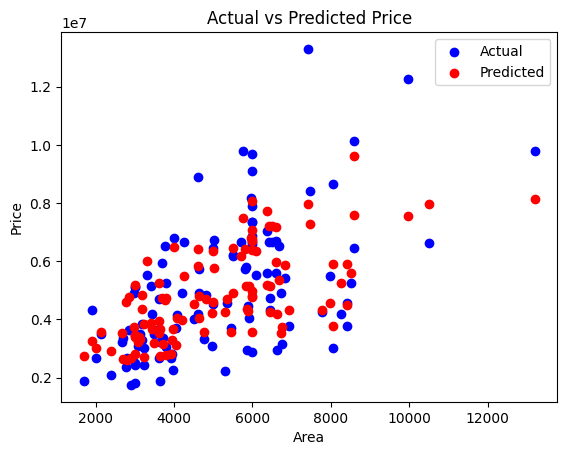

In [37]:
plt.scatter(x_test['area'], y_test, color='blue', label='Actual')
plt.scatter(x_test['area'], y_pred, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()


## Coefficient Interpretation


In [38]:
coef_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

                            Feature   Coefficient
2                         bathrooms  1.094445e+06
8                   airconditioning  7.914267e+05
7                   hotwaterheating  6.846499e+05
12                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
6                          basement  3.902512e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
9                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
10  furnishingstatus_semi-furnished -1.268818e+05
11     furnishingstatus_unfurnished -4.136451e+05
